In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] =15,9
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [42]:
df = pd.read_csv('Queen_1year_Raw.csv')

In [43]:
df.tail()

,ArrivalTime,DepartureTime
783902,12/31/17 23:15,1/1/18 0:00
783903,12/31/17 23:45,1/1/18 0:00
783904,12/31/17 23:51,1/1/18 0:00
783905,12/31/17 23:54,1/1/18 0:00
783906,12/31/17 23:58,1/1/18 0:00


In [44]:
df.head(20)

,ArrivalTime,DepartureTime
0,1/1/17 0:00,1/1/17 0:56
1,1/1/17 0:00,1/1/17 3:36
2,1/1/17 0:00,1/1/17 0:36
3,1/1/17 0:00,1/1/17 7:30
4,1/1/17 0:00,1/1/17 3:19
5,1/1/17 0:00,1/1/17 0:01
6,1/1/17 0:00,1/1/17 0:01
7,1/1/17 0:00,1/1/17 1:26
8,1/1/17 0:00,1/1/17 0:33
9,1/1/17 0:00,1/1/17 0:23


In [45]:
df.shape

(783907, 2)

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 783907 entries, 0 to 783906
Data columns (total 2 columns):
ArrivalTime      783907 non-null object
DepartureTime    783907 non-null object
dtypes: object(2)
memory usage: 12.0+ MB


In [47]:
df['start_time'] = pd.to_datetime(df.ArrivalTime).astype('datetime64[s]')
df['end_time'] = pd.to_datetime(df.DepartureTime).astype('datetime64[s]')

In [48]:
df['start_from_fc']= df.start_time.dt.floor('5min')
df['end_from_fc'] = df.end_time.dt.ceil('5min')

In [49]:
df.head()

,ArrivalTime,DepartureTime,start_time,end_time,start_from_fc,end_from_fc
0,1/1/17 0:00,1/1/17 0:56,2017-01-01,2017-01-01 00:56:00,2017-01-01,2017-01-01 01:00:00
1,1/1/17 0:00,1/1/17 3:36,2017-01-01,2017-01-01 03:36:00,2017-01-01,2017-01-01 03:40:00
2,1/1/17 0:00,1/1/17 0:36,2017-01-01,2017-01-01 00:36:00,2017-01-01,2017-01-01 00:40:00
3,1/1/17 0:00,1/1/17 7:30,2017-01-01,2017-01-01 07:30:00,2017-01-01,2017-01-01 07:30:00
4,1/1/17 0:00,1/1/17 3:19,2017-01-01,2017-01-01 03:19:00,2017-01-01,2017-01-01 03:20:00


In [50]:
df.dtypes

ArrivalTime              object
DepartureTime            object
start_time       datetime64[ns]
end_time         datetime64[ns]
start_from_fc    datetime64[ns]
end_from_fc      datetime64[ns]
dtype: object

In [51]:
n = (df.end_from_fc - df.start_from_fc)
# n,(n.dt.total_seconds())/60
df['diff'] = (n.dt.total_seconds())/60

In [52]:
df.head()

,ArrivalTime,DepartureTime,start_time,end_time,start_from_fc,end_from_fc,diff
0,1/1/17 0:00,1/1/17 0:56,2017-01-01,2017-01-01 00:56:00,2017-01-01,2017-01-01 01:00:00,60.0
1,1/1/17 0:00,1/1/17 3:36,2017-01-01,2017-01-01 03:36:00,2017-01-01,2017-01-01 03:40:00,220.0
2,1/1/17 0:00,1/1/17 0:36,2017-01-01,2017-01-01 00:36:00,2017-01-01,2017-01-01 00:40:00,40.0
3,1/1/17 0:00,1/1/17 7:30,2017-01-01,2017-01-01 07:30:00,2017-01-01,2017-01-01 07:30:00,450.0
4,1/1/17 0:00,1/1/17 3:19,2017-01-01,2017-01-01 03:19:00,2017-01-01,2017-01-01 03:20:00,200.0


In [53]:
df['slots'] = df['diff']/5
df['slots']=df['slots'].astype('int64')
df['bins'] = df.slots.map( lambda x: np.arange(1,x+1,1) if x > 1.0 else np.arange(1,x+1))

In [54]:
df['start'] = df.start_time.dt.date
df['start'] = pd.to_datetime(df.start,format='%Y\%m\%d')

In [55]:
df.tail()

,ArrivalTime,DepartureTime,start_time,end_time,start_from_fc,end_from_fc,diff,slots,bins,start
783902,12/31/17 23:15,1/1/18 0:00,2017-12-31 23:15:00,2018-01-01,2017-12-31 23:15:00,2018-01-01,45.0,9,"[1, 2, 3, 4, 5, 6, 7, 8, 9]",2017-12-31
783903,12/31/17 23:45,1/1/18 0:00,2017-12-31 23:45:00,2018-01-01,2017-12-31 23:45:00,2018-01-01,15.0,3,"[1, 2, 3]",2017-12-31
783904,12/31/17 23:51,1/1/18 0:00,2017-12-31 23:51:00,2018-01-01,2017-12-31 23:50:00,2018-01-01,10.0,2,"[1, 2]",2017-12-31
783905,12/31/17 23:54,1/1/18 0:00,2017-12-31 23:54:00,2018-01-01,2017-12-31 23:50:00,2018-01-01,10.0,2,"[1, 2]",2017-12-31
783906,12/31/17 23:58,1/1/18 0:00,2017-12-31 23:58:00,2018-01-01,2017-12-31 23:55:00,2018-01-01,5.0,1,[1],2017-12-31


In [34]:
def explode(df, lst_cols, fill_value=''):
    if lst_cols and not isinstance(lst_cols, list):
        lst_cols = [lst_cols]
    idx_cols = df.columns.difference(lst_cols)
    lens = df[lst_cols[0]].str.len()
    if (lens > 0).all():
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .loc[:, df.columns]
    else:
        return pd.DataFrame({
            col:np.repeat(df[col].values, lens)
            for col in idx_cols
        }).assign(**{col:np.concatenate(df[col].values) for col in lst_cols}) \
          .append(df.loc[lens==0, idx_cols]).fillna(fill_value) \
          .loc[:, df.columns]

In [56]:
new_df=explode(df, ['bins'], fill_value='')

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/pandas/core/frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [57]:
new_df.loc[new_df['bins']==""]

,ArrivalTime,DepartureTime,start_time,end_time,start_from_fc,end_from_fc,diff,slots,bins,start
215,1/1/17 1:50,1/1/17 1:50,2017-01-01 01:50:00,2017-01-01 01:50:00,2017-01-01 01:50:00,2017-01-01 01:50:00,0.0,0,,2017-01-01
257,1/1/17 2:05,1/1/17 2:05,2017-01-01 02:05:00,2017-01-01 02:05:00,2017-01-01 02:05:00,2017-01-01 02:05:00,0.0,0,,2017-01-01
397,1/1/17 3:35,1/1/17 3:35,2017-01-01 03:35:00,2017-01-01 03:35:00,2017-01-01 03:35:00,2017-01-01 03:35:00,0.0,0,,2017-01-01
443,1/1/17 4:00,1/1/17 4:00,2017-01-01 04:00:00,2017-01-01 04:00:00,2017-01-01 04:00:00,2017-01-01 04:00:00,0.0,0,,2017-01-01
638,1/1/17 5:35,1/1/17 5:35,2017-01-01 05:35:00,2017-01-01 05:35:00,2017-01-01 05:35:00,2017-01-01 05:35:00,0.0,0,,2017-01-01
790,1/1/17 7:30,1/1/17 7:30,2017-01-01 07:30:00,2017-01-01 07:30:00,2017-01-01 07:30:00,2017-01-01 07:30:00,0.0,0,,2017-01-01
796,1/1/17 7:30,1/1/17 7:30,2017-01-01 07:30:00,2017-01-01 07:30:00,2017-01-01 07:30:00,2017-01-01 07:30:00,0.0,0,,2017-01-01
871,1/1/17 8:30,1/1/17 8:30,2017-01-01 08:30:00,2017-01-01 08:30:00,2017-01-01 08:30:00,2017-01-01 08:30:00,0.0,0,,2017-01-01
1117,1/1/17 10:45,1/1/17 10:45,2017-01-01 10:45:00,2017-01-01 10:45:00,2017-01-01 10:45:00,2017-01-01 10:45:00,0.0,0,,2017-01-01
1166,1/1/17 11:05,1/1/17 11:05,2017-01-01 11:05:00,2017-01-01 11:05:00,2017-01-01 11:05:00,2017-01-01 11:05:00,0.0,0,,2017-01-01


In [24]:
new_df['bins'] = (new_df.start_from_fc + pd.to_timedelta(5*(new_df['bins']), unit='m'))
new_df['bins1'] = new_df.bins - pd.to_timedelta(5, unit='m')

In [25]:
new_df.groupby(['bins1','bins']).count()[['start_from_fc']]

,,start_from_fc
bins1,bins,
2017-01-01 00:00:00,2017-01-01 00:05:00,31
2017-01-01 00:05:00,2017-01-01 00:10:00,27
2017-01-01 00:10:00,2017-01-01 00:15:00,27
2017-01-01 00:15:00,2017-01-01 00:20:00,27
2017-01-01 00:20:00,2017-01-01 00:25:00,28
2017-01-01 00:25:00,2017-01-01 00:30:00,28
2017-01-01 00:30:00,2017-01-01 00:35:00,35
2017-01-01 00:35:00,2017-01-01 00:40:00,36
2017-01-01 00:40:00,2017-01-01 00:45:00,28


In [26]:
df_5min = new_df.groupby(['bins1','bins']).count()[['start_from_fc']].add_suffix('_Count').reset_index()

In [27]:
df_5min.rename(columns={'bins1':'start_time','bins':'end_time'
                        ,'start_from_fc_Count':'no_of_cars'}
               ,inplace=True)

In [29]:
df_5min.tail(50)

,start_time,end_time,no_of_cars
137204,2018-04-22 09:40:00,2018-04-22 09:45:00,2
137205,2018-04-22 09:45:00,2018-04-22 09:50:00,2
137206,2018-04-22 09:50:00,2018-04-22 09:55:00,2
137207,2018-04-22 09:55:00,2018-04-22 10:00:00,2
137208,2018-04-22 10:00:00,2018-04-22 10:05:00,2
137209,2018-04-22 10:05:00,2018-04-22 10:10:00,2
137210,2018-04-22 10:10:00,2018-04-22 10:15:00,2
137211,2018-04-22 10:15:00,2018-04-22 10:20:00,2
137212,2018-04-22 10:20:00,2018-04-22 10:25:00,2
137213,2018-04-22 10:25:00,2018-04-22 10:30:00,2


In [60]:
df_all_sensors_1stweek = df_5min.groupby([df_5min.start_time.dt.dayofweek])\
.sum()[['no_of_cars']].add_suffix('_Count').reset_index()

AttributeError: Can only use .dt accessor with datetimelike values

In [ ]:
df_all_sensors_1stweek.set_index('start_time').plot()

In [ ]:
df_all_sensors_1stweek

In [3]:
df_5min = pd.read_csv('queen.csv')

In [4]:
df_5min.columns

Index(['Unnamed: 0', 'start_time', 'end_time', 'no_of_cars'], dtype='object')

In [63]:
df_5min['start_time'] = pd.to_datetime(df_5min.start_time).astype('datetime64[s]')

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [66]:
df_all_sensors_1stweek = df_5min.groupby([df_5min.start_time.dt.dayofweek]).sum()[['no_of_cars']].add_suffix('_Count').reset_index()

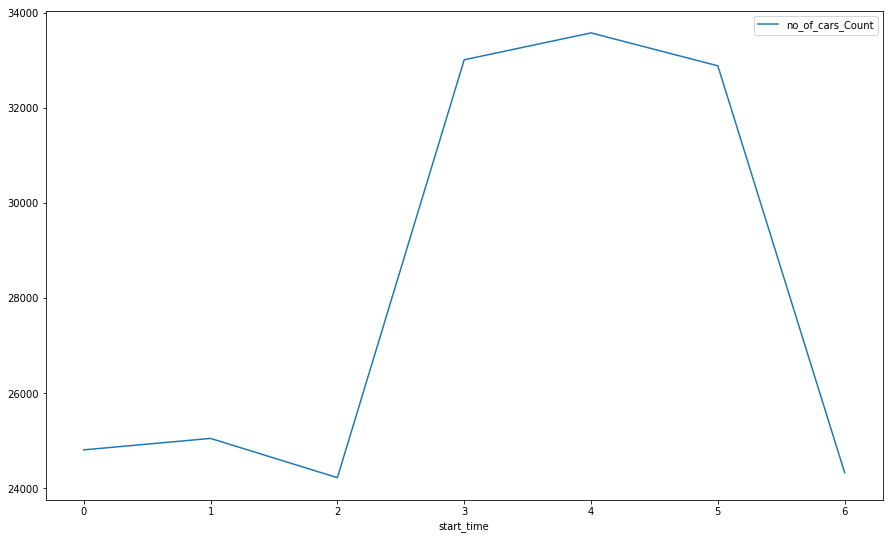

In [67]:
df_all_sensors_1stweek.set_index('start_time').plot()

In [68]:
df_all_sensors_1stweek

,start_time,no_of_cars_Count
0,0,24813
1,1,25054
2,2,24228
3,3,33022
4,4,33588
5,5,32895
6,6,24333


In [69]:
df_5min.dtypes

start_time    datetime64[ns]
end_time              object
no_of_cars             int64
dtype: object

In [74]:
df_5min.loc[(df_5min['start_time']>='2017-08-03') & 
            (df_5min['start_time']<='2017-08-10')].groupby([df_5min.start_time.dt.date]).count()[['no_of_cars']]

,no_of_cars
start_time,
2017-08-03,288
2017-08-04,288
2017-08-05,288
2017-08-06,288
2017-08-07,288
2017-08-08,288
2017-08-09,288
2017-08-10,1


In [5]:
df_5min.drop(columns={'Unnamed: 0'},inplace=True)

In [27]:
df_5min = df_5min.loc[(df_5min['start_time']<='2017-08-27') & (df_5min['start_time']>='2017-08-03')]

In [75]:
df_tst_5min= df_5min[['start_time','no_of_cars']]
df_tst_5min = df_tst_5min.set_index('start_time')

In [76]:
df_tst_5min.head()

,no_of_cars
start_time,
2017-08-03 00:00:00,27
2017-08-03 00:05:00,29
2017-08-03 00:10:00,29
2017-08-03 00:15:00,28
2017-08-03 00:20:00,27


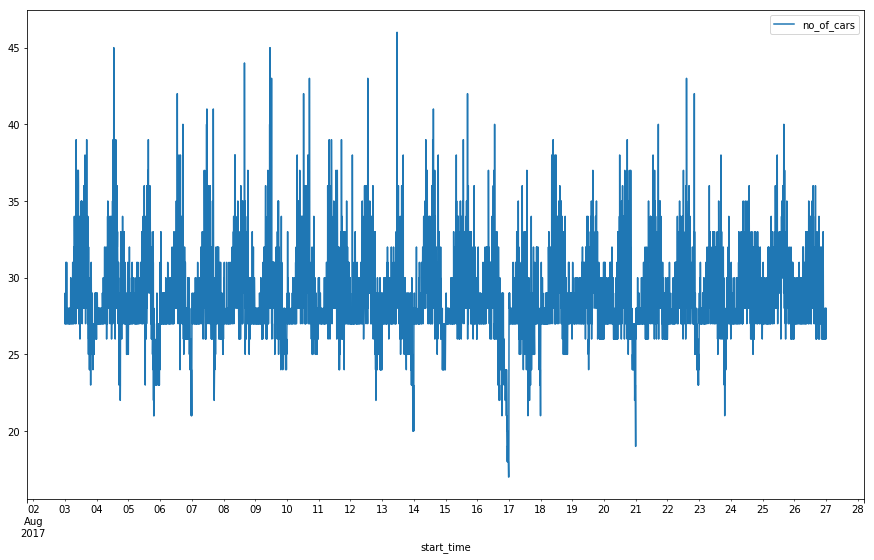

In [77]:
df_tst_5min.plot(figsize=(15,9))

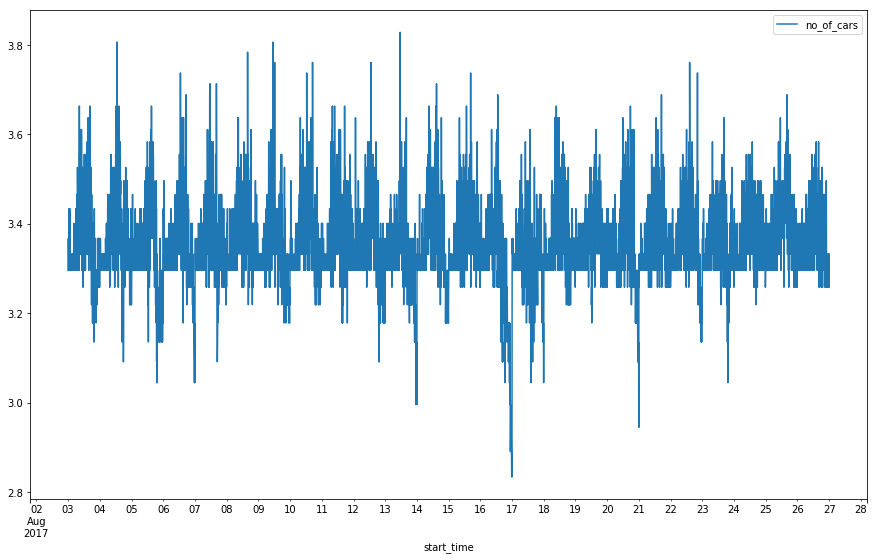

In [78]:
indexedDataset_logScale = np.log(df_tst_5min)
indexedDataset_logScale.plot(figsize=(15,9))

In [79]:
def test_stationarity(timeseries):
    
    movingAverage = timeseries.rolling(window=50).mean()
    movingSTD = timeseries.rolling(window=50).std()
    
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['no_of_cars'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

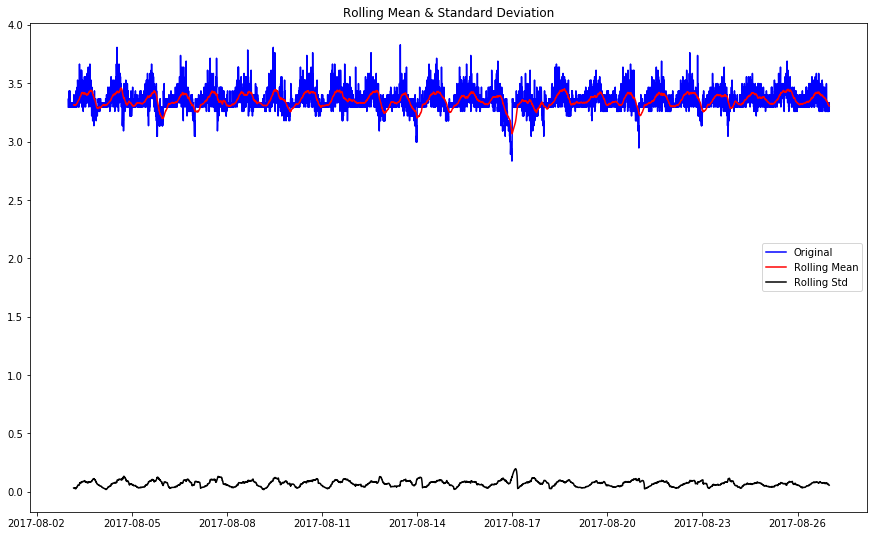

Results of Dickey Fuller Test:
Test Statistic                -8.983090e+00
p-value                        7.221264e-15
#Lags Used                     1.700000e+01
Number of Observations Used    6.894000e+03
Critical Value (10%)          -2.566993e+00
Critical Value (1%)           -3.431299e+00
Critical Value (5%)           -2.861959e+00
dtype: float64


In [80]:
test_stationarity(indexedDataset_logScale)

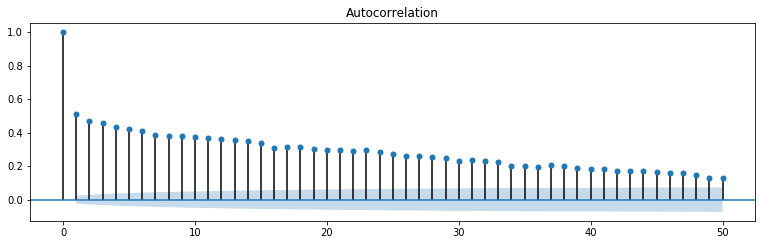

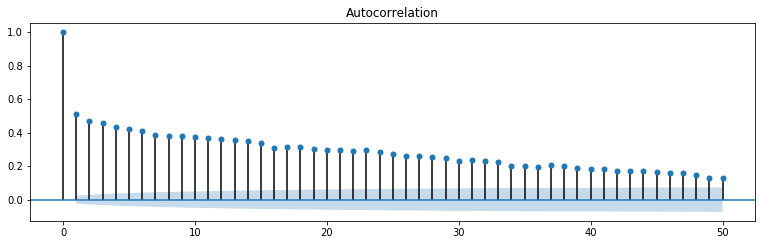

In [81]:
from statsmodels.graphics.tsaplots import plot_acf
fig=plt.figure(figsize=(13,8))
ax1=fig.add_subplot(211)
plot_acf(indexedDataset_logScale,lags=50,ax=ax1)

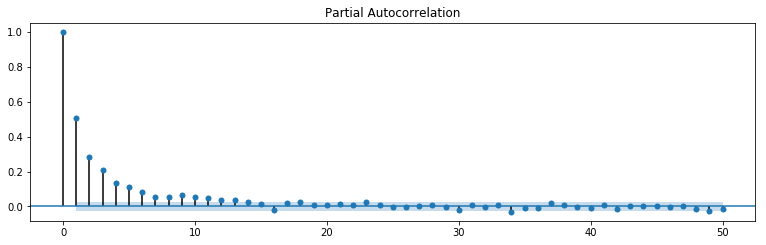

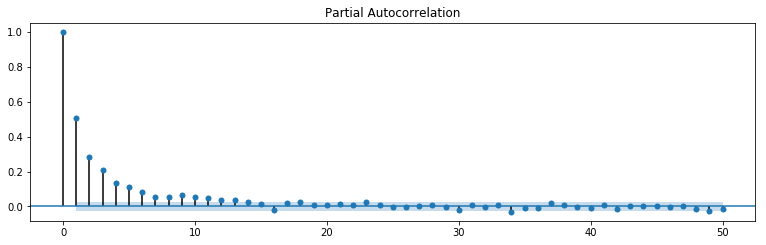

In [82]:
from statsmodels.graphics.tsaplots import plot_pacf
fig=plt.figure(figsize=(13,8))
ax1=fig.add_subplot(211)
plot_pacf(indexedDataset_logScale,lags=50,ax=ax1)

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)


Plotting AR model
Lag:  -17457.19459379042 -17387.98803082188 -17433.427203395106


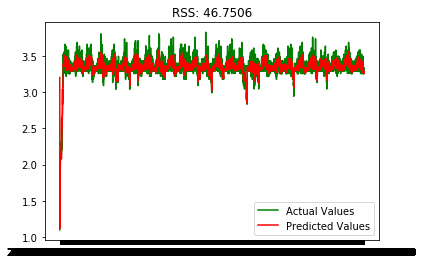

In [16]:
model = ARIMA(indexedDataset_logScale, order=(8,0,0))
results_AR = model.fit(disp=-1)
plt.plot(indexedDataset_logScale, color='green',label='Actual Values')
plt.plot(results_AR.fittedvalues, color='red', label='Predicted Values')
plt.legend(loc='best')
plt.title('RSS: %.4f'%sum((results_AR.fittedvalues - indexedDataset_logScale['no_of_cars'])**2))
print('Plotting AR model')

print("Lag: ", results_AR.aic, results_AR.bic, results_AR.hqic)

In [83]:
arma_model_2 = sm.tsa.ARMA(indexedDataset_logScale, (2, 0)).fit(disp=False)
arma_model_3 = sm.tsa.ARMA(indexedDataset_logScale, (3, 0)).fit(disp=False)
arma_model_5 = sm.tsa.ARMA(indexedDataset_logScale, (5, 0)).fit(disp=False)
arma_model_7 = sm.tsa.ARMA(indexedDataset_logScale, (7, 0)).fit(disp=False)
arma_model_10 = sm.tsa.ARMA(indexedDataset_logScale, (10, 0)).fit(disp=False)

/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency 5T will be used.
  % freq, ValueWarning)
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/scipy/signal/signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
/Users/neerajpadarthi/anaconda3/envs/work/lib/python3.5/site-packages/scipy/signal/signaltools.py:1344: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
 

In [85]:
print("Lag 2: ", arma_model_2.aic, arma_model_2.bic, arma_model_2.hqic)
print("Lag 3: ", arma_model_3.aic, arma_model_3.bic, arma_model_3.hqic)
print("Lag 5: ", arma_model_5.aic, arma_model_5.bic, arma_model_5.hqic)
print("Lag 7: ", arma_model_7.aic, arma_model_7.bic, arma_model_7.hqic)
print("Lag 10: ", arma_model_10.aic, arma_model_10.bic, arma_model_10.hqic)

Lag 2:  -16065.836935256586 -16038.47287801465 -16056.401722368008
Lag 3:  -16380.933364647273 -16346.728293094853 -16369.13934853655
Lag 5:  -16586.028206490955 -16538.14110631757 -16569.516583935943
Lag 7:  -16651.55698755499 -16589.987858760636 -16630.32775855569
Lag 10:  -16713.93257208912 -16631.840400363315 -16685.626933423388


In [41]:
from pyramid.arima import auto_arima

In [45]:
!pip install pyramid-arima

In [46]:
stepwise_model = auto_arima(df_tst_5min, start_p=1, start_q=1,
                           max_p=3, max_q=3, m=12,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True)
print(stepwise_model.aic())

AttributeError: module 'pyramid' has no attribute '__version__'

In [86]:
X = indexedDataset_logScale.values
X1= df_tst_5min.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
size1 = int(len(X1) * 0.66)
train1, test1 = X1[0:size1], X1[size1:len(X1)]
print(train.shape)
print(test.shape)

(4561, 1)
(2351, 1)


In [87]:
history = [x for x in train1]
predictions = list()
for t in range(len(test1)):
	model =  ARIMA(history, order=(4,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test1[t]
	history.append(obs)
# 	print('predicted=%f, expected=%f' % (yhat, obs))
error = (mean_squared_error(test1, predictions))
print('Test MSE: %.3f' % error)
# plot
plt.plot(test1, color='green',label='Actual Values')
plt.plot(predictions, color='red', label='Predicted Values',alpha=0.6)
plt.legend(loc='best')
plt.title('Actual vs Predicted Values')
plt.show(block=False)

KeyboardInterrupt: 

In [89]:
n = sm.tsa.SARIMAX(test1, order=(10,1,1), seasonal_order=(10,1,1,150)).fit(disp=False)
print(n.aic)
j = n.predict(0,2465)
plt.plot(test1)
plt.plot(j)
plt.plot(figsize=(25,12))

KeyboardInterrupt: 

In [42]:
df_tst_5min.head()

,no_of_cars
start_time,
2017-08-01 00:15:00,3
2017-08-01 00:20:00,3
2017-08-01 00:25:00,3
2017-08-01 00:30:00,7
2017-08-01 00:35:00,7
